In [1]:

import tensorflow as tf
import pandas as pd
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt



In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=42
)


In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

### Data

Feature names in order:

* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per 10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in $1000's

In [15]:
normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=1)
normalizer.adapt(x_train)

In [16]:
print(normalizer.mean.numpy())


[[3.78998899e+00 1.15680704e+01 1.12140598e+01 6.93069249e-02
  5.54524004e-01 6.28482437e+00 6.91193085e+01 3.79225826e+00
  9.66089153e+00 4.08960419e+02 1.84819336e+01 3.56293091e+02
  1.28255205e+01]]


In [18]:

## Callbacks

# End training if no improvement seen
early_stop_callbk = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.05, patience=5)

# Optimize LR
opt_LR_callbk = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2
)



In [38]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=['mse'])
  return model



In [39]:
model_1 = get_basic_model()
history_1 = model_1.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, 
                callbacks=[early_stop_callbk, opt_LR_callbk])

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 527.3986 - mse: 527.3986 - val_loss: 534.2750 - val_mse: 534.2750 - lr: 0.0100
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 455.7918 - mse: 455.7918 - val_loss: 446.0573 - val_mse: 446.0573 - lr: 0.0100
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 371.6949 - mse: 371.6949 - val_loss: 343.2375 - val_mse: 343.2375 - lr: 0.0100
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 277.0343 - mse: 277.0343 - val_loss: 232.7825 - val_mse: 232.7825 - lr: 0.0100
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 185.9684 - mse: 185.9684 - val_loss: 144.3826 - val_mse: 144.3826 - lr: 0.0100
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 124.8574 - mse: 124.8574 - val_loss: 93.2110 - val_mse: 93.2110 - lr: 0.0100
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 89.6347 - mse: 8

In [40]:


hist_1_df = pd.DataFrame(history_1.history)
hist_1_df.head()



,loss,mse,val_loss,val_mse,lr
0,527.398621,527.398621,534.274963,534.274963,0.01
1,455.791809,455.791809,446.057343,446.057343,0.01
2,371.694946,371.694946,343.237518,343.237518,0.01
3,277.034302,277.034302,232.782547,232.782547,0.01
4,185.968430,185.968430,144.382599,144.382599,0.01


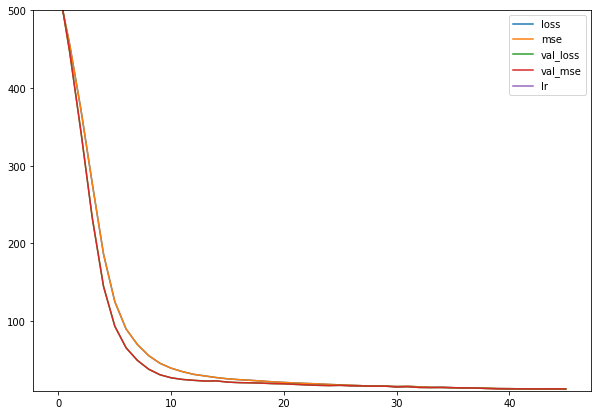

In [41]:


hist_1_df.plot(figsize=(10,7), ylim=(10,500))



In [42]:


# make predictions on test data
y_pred = model_1.predict(x_test)



In [43]:


# Measure MSE & MAE of predicitons vs. actual
mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()

mse(y_test, y_pred).numpy(), mae(y_test, y_pred).numpy()



(133.10094, 8.8556595)